## WNTR test installation
## Imports

In [1]:
# Install required packages if not already available
try:
    import wntr
except ImportError:
    !pip install wntr
    import wntr  # import again after installation

In [2]:
# show package version
print("WNTR version:", wntr.__version__)

WNTR version: 1.2.0


## Units
WNTR uses SI (International System) units (length in meters, time in seconds, mass in kilograms).  See https://usepa.github.io/WNTR/units.html for more details.

# Water Network Model

The `WaterNetworkModel` object defines the water distribution system and simulation options. The object can be created from an EPANET INP file.

In [3]:
# Create a WaterNetworkModel from an EPANET INP file
wn = wntr.network.WaterNetworkModel('networks/Net1.inp')

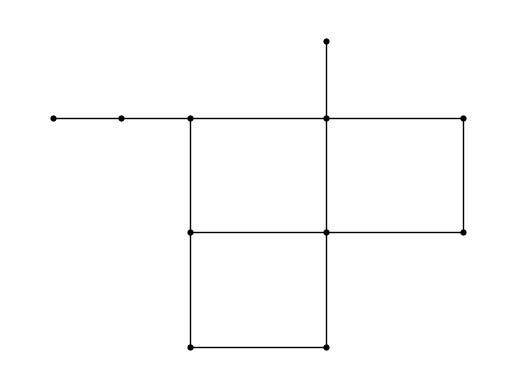

In [4]:
# Plot a basic network graphic
ax = wntr.graphics.plot_network(wn)

## Run hydraulic simulation and get results

In [5]:
# Simulate hydraulics using EPANET
sim = wntr.sim.EpanetSimulator(wn)
results_EPANET = sim.run_sim()

In [6]:
# View EpanetSimulator pressure results
results_EPANET.node['pressure'].head()

name,10,11,12,13,21,22,23,31,32,9,2
0,89.717087,83.890205,82.317276,83.476387,82.767410,83.539085,84.931053,81.500954,77.934105,0.0,36.575996
600,89.840057,84.030090,82.472992,83.631416,82.917427,83.693291,85.085518,81.651947,78.086449,0.0,36.731857
1200,89.962578,84.169411,82.628113,83.785858,83.066872,83.846916,85.239403,81.802338,78.238197,0.0,36.887123
1800,90.084625,84.308212,82.782623,83.939728,83.215752,83.999947,85.392700,81.952164,78.389366,0.0,37.041794
2400,90.206192,84.446472,82.936569,84.092987,83.364059,84.152390,85.545403,82.101418,78.539970,0.0,37.195885


Text(0, 0.5, 'Demand (m$^3$/s)')

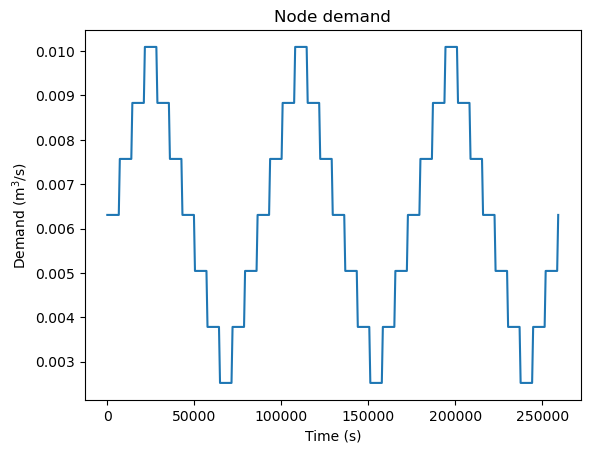

In [7]:
# Plot demand timeseries of a given node
node_pressure = results_EPANET.node['demand'].loc[:,'32']
ax = node_pressure.plot(title='Node demand')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Demand (m$^3$/s)')

Text(0, 0.5, 'Pressure (m)')

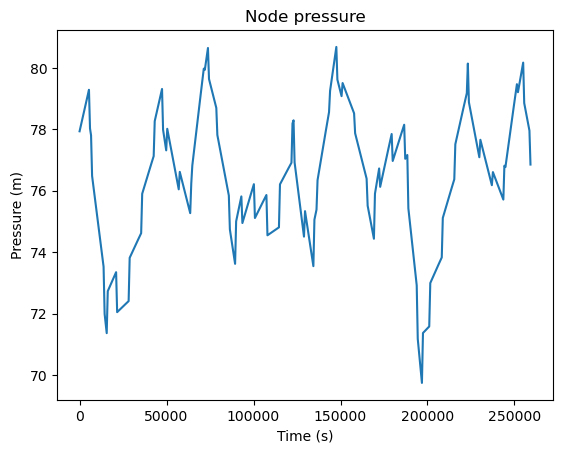

In [8]:
# Plot pressure head timeseries of a given node
node_pressure = results_EPANET.node['pressure'].loc[:,'32']
ax = node_pressure.plot(title='Node pressure')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pressure (m)')

Text(0, 0.5, 'Tank Level (m)')

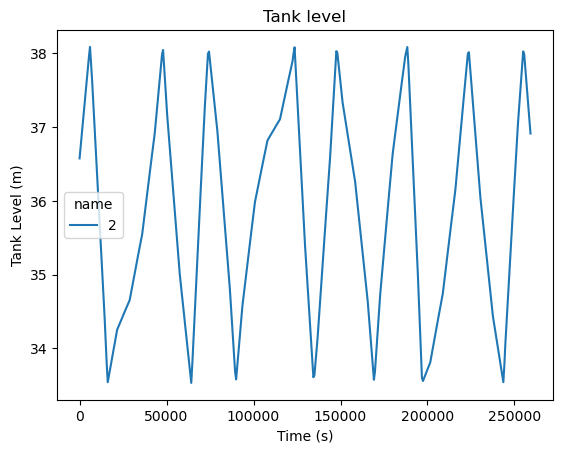

In [9]:
# Plot timeseries of tank levels
tank_levels = results_EPANET.node['pressure'].loc[:,wn.tank_name_list]
ax = tank_levels.plot(title='Tank level')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Tank Level (m)')

Text(0, 0.5, 'Pump flowrate (m$^3$/s)')

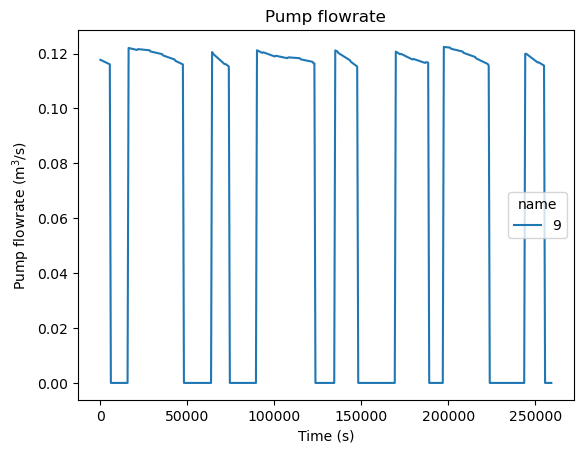

In [10]:
# Plot timeseries of pump flowrates
pump_flowrates = results_EPANET.link['flowrate'].loc[:,wn.pump_name_list]
ax = pump_flowrates.plot(title='Pump flowrate')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pump flowrate (m$^3$/s)')

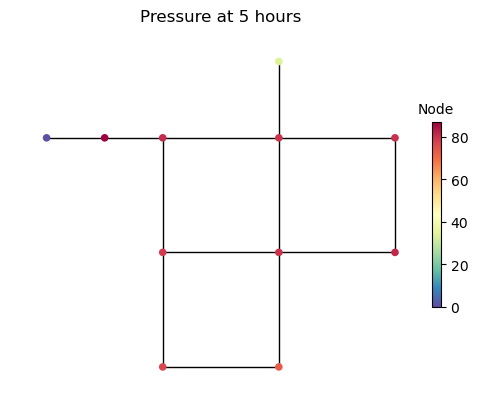

In [11]:
# Plot pressure at hour 5 on the network
pressure_at_5hr = results_EPANET.node['pressure'].loc[5*3600, :]
ax = wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=30, title='Pressure at 5 hours')